In [11]:
# Import library yang dibutuhkan
import pandas as pd

# Load dataset dari file CSV
file_path = '/content/drive/MyDrive/Colab Notebooks/eda/kc_house_data_finish.csv'
df = pd.read_csv(file_path)

# Melihat 5 baris pertama dari dataset
print(df.head())

    price  bedrooms  bathrooms  sqft_living  floors  waterfront  condition  \
0  221900         3       1.00         1180     1.0           0          3   
1  538000         3       2.25         2570     2.0           0          3   
2  180000         2       1.00          770     1.0           0          3   
3  604000         4       3.00         1960     1.0           0          5   
4  510000         3       2.00         1680     1.0           0          3   

   grade  
0      7  
1      7  
2      6  
3      7  
4      8  


In [12]:
# Melihat nama kolom di dataset
print(df.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'condition', 'grade'],
      dtype='object')


**Membuat Visualisasi Data**

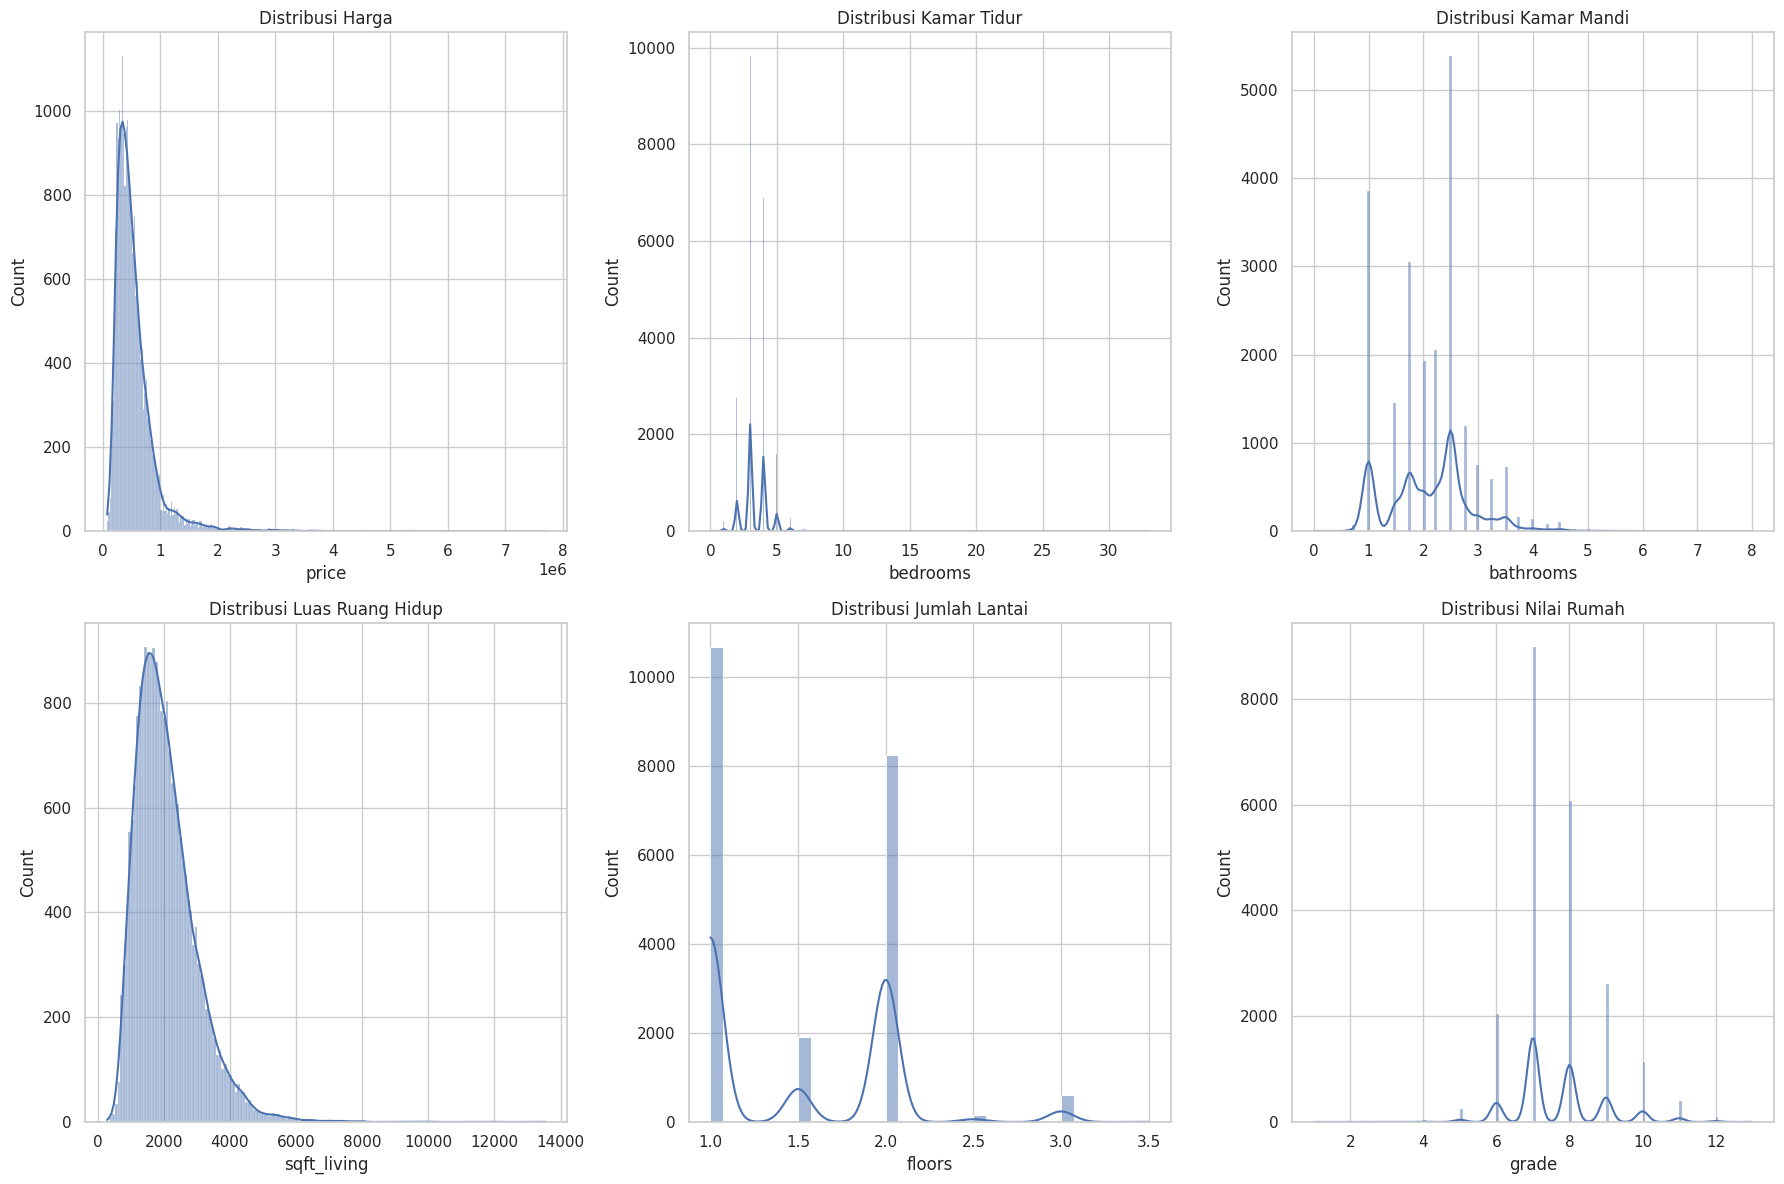

In [14]:
# Import library visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# Membuat subplots untuk visualisasi distribusi variabel kontinu
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Distribusi harga rumah
sns.histplot(df['price'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribusi Harga')

# Distribusi jumlah kamar tidur
sns.histplot(df['bedrooms'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribusi Kamar Tidur')

# Distribusi jumlah kamar mandi
sns.histplot(df['bathrooms'], kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Distribusi Kamar Mandi')

# Distribusi luas ruang hidup (sqft)
sns.histplot(df['sqft_living'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribusi Luas Ruang Hidup')

# Distribusi jumlah lantai
sns.histplot(df['floors'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribusi Jumlah Lantai')

# Distribusi nilai/grade rumah
sns.histplot(df['grade'], kde=True, ax=axes[1, 2])
axes[1, 2].set_title('Distribusi Nilai Rumah')

# Mengatur tata letak agar tidak saling tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()


-Distribusi Harga (price):
Distribusi harga rumah sangat condong ke kanan (right-skewed), dengan sebagian besar rumah berada dalam rentang harga yang lebih rendah.
Hanya sedikit rumah yang memiliki harga sangat tinggi, di atas 1 juta USD, yang terlihat sebagai ekor panjang pada histogram.

-Distribusi Jumlah Kamar Tidur (bedrooms):
Sebagian besar rumah memiliki 2 hingga 5 kamar tidur, dengan puncak distribusi pada sekitar 3 kamar tidur.
Ada beberapa outlier, misalnya, rumah dengan lebih dari 10 atau bahkan 30 kamar tidur yang terlihat jarang sekali.

-Distribusi Jumlah Kamar Mandi (bathrooms):
Jumlah kamar mandi terlihat terdistribusi dengan baik di sekitar 1 hingga 3 kamar mandi, dengan puncak sekitar 2 kamar mandi.
Distribusi sedikit skewed, dengan ekor panjang menuju jumlah kamar mandi yang lebih besar, namun jarang ada rumah yang memiliki lebih dari 4 kamar mandi.

-Distribusi Luas Ruang Hidup (sqft_living):
Distribusi luas ruang hidup juga right-skewed, dengan sebagian besar rumah memiliki luas antara 1.000 hingga 3.000 kaki persegi.
Beberapa rumah dengan luas lebih dari 10.000 kaki persegi muncul sebagai outlier.

-Distribusi Jumlah Lantai (floors):
Sebagian besar rumah memiliki 1 hingga 2 lantai, dengan puncak distribusi pada 1 lantai.
Ada sedikit rumah dengan 3 lantai atau lebih, yang merupakan bagian kecil dari keseluruhan distribusi.

-Distribusi Nilai Rumah (grade):
Nilai rumah memiliki puncak pada nilai 7 (berkisar 6 hingga 8), yang kemungkinan adalah nilai rata-rata untuk rumah dalam dataset ini.
Distribusi ini menunjukkan bahwa mayoritas rumah berada dalam kategori kualitas yang baik dengan hanya sedikit rumah yang memiliki nilai di bawah atau di atas.








**Analisis Pemusatan Data**

In [15]:
# Import library yang diperlukan
import pandas as pd

# Fungsi untuk menampilkan pemusatan data
def pemusatan_data(df):
    # Membuat DataFrame kosong untuk menyimpan hasil
    stats = pd.DataFrame(index=['Mean (Rata-rata)', 'Median', 'Modus'])

    # Loop melalui setiap kolom numerik
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        mean_val = df[col].mean()
        median_val = df[col].median()
        mode_val = df[col].mode()[0]  # Mode bisa memiliki lebih dari satu nilai, jadi ambil yang pertama

        # Menyimpan hasil ke dalam DataFrame
        stats[col] = [mean_val, median_val, mode_val]

    return stats

# Memanggil fungsi pemusatan data
hasil_pemusatan = pemusatan_data(df)

# Menampilkan hasil pemusatan data
print(hasil_pemusatan)

                          price  bedrooms  bathrooms  sqft_living    floors  \
Mean (Rata-rata)  540088.141767  3.370842   2.114757  2079.899736  1.494309   
Median            450000.000000  3.000000   2.250000  1910.000000  1.500000   
Modus             350000.000000  3.000000   2.500000  1300.000000  1.000000   

                  waterfront  condition     grade  
Mean (Rata-rata)    0.007542    3.40943  7.656873  
Median              0.000000    3.00000  7.000000  
Modus               0.000000    3.00000  7.000000  


Sebagian besar rumah memiliki harga dan ukuran yang terjangkau.
Kebanyakan rumah dalam kondisi dan kualitas baik, dengan sedikit akses ke waterfront.

**Penyebaran Data**

In [16]:
# Menghitung ukuran penyebaran data
data_spread = {
    'Rata-rata': df.mean(),
    'Median': df.median(),
    'Modus': df.mode().iloc[0],  # Mengambil modus pertama
    'Rentang': df.max() - df.min(),
    'Varians': df.var(),
    'Deviasi Standar': df.std()
}

# Mengubah ke DataFrame untuk tampilan yang lebih baik
spread_df = pd.DataFrame(data_spread)
spread_df = spread_df.transpose()  # Transpose untuk memudahkan pembacaan

# Menampilkan hasil
print(spread_df)

                        price   bedrooms  bathrooms    sqft_living    floors  \
Rata-rata        5.400881e+05   3.370842   2.114757    2079.899736  1.494309   
Median           4.500000e+05   3.000000   2.250000    1910.000000  1.500000   
Modus            3.500000e+05   3.000000   2.500000    1300.000000  1.000000   
Rentang          7.625000e+06  33.000000   8.000000   13250.000000  2.500000   
Varians          1.347824e+11   0.865015   0.593151  843533.681368  0.291588   
Deviasi Standar  3.671272e+05   0.930062   0.770163     918.440897  0.539989   

                 waterfront  condition      grade  
Rata-rata          0.007542   3.409430   7.656873  
Median             0.000000   3.000000   7.000000  
Modus              0.000000   3.000000   7.000000  
Rentang            1.000000   4.000000  12.000000  
Varians            0.007485   0.423467   1.381703  
Deviasi Standar    0.086517   0.650743   1.175459  


**Menghitung Skewness**

In [17]:
# Menghitung skewness
skewness = df.skew()

# Menampilkan hasil skewness
print("Skewness:")
print(skewness)

Skewness:
price           4.024069
bedrooms        1.974300
bathrooms       0.511108
sqft_living     1.471555
floors          0.616177
waterfront     11.385108
condition       1.032805
grade           0.771103
dtype: float64


1. Harga (price):
Skewness = 4.02: Sangat miring ke kanan. Sebagian besar rumah murah, tetapi ada beberapa rumah mahal.
2. Jumlah Kamar Tidur (bedrooms):
Skewness = 1.97: Miring ke kanan. Kebanyakan rumah memiliki 2-4 kamar tidur, dengan beberapa yang lebih banyak.
3. Jumlah Kamar Mandi (bathrooms):
Skewness = 0.51: Miring ke kanan. Distribusi agak seimbang, tetapi cenderung memiliki lebih sedikit kamar mandi.
4. Luas Ruang Hidup (sqft_living):
Skewness = 1.47: Miring ke kanan. Banyak rumah kecil, tetapi ada juga yang sangat besar.
5. Jumlah Lantai (floors):
Skewness = 0.62: Miring ke kanan. Kebanyakan rumah satu atau dua lantai.
6. Akses Waterfront (waterfront):
Skewness = 11.39: Sangat miring ke kanan. Hampir semua rumah tidak memiliki akses waterfront, sangat sedikit yang memiliki.
7. Kondisi Rumah (condition):
Skewness = 1.03: Miring ke kanan. Kebanyakan rumah dalam kondisi rata-rata, sedikit yang sangat baik.
8. Nilai Rumah (grade):
Skewness = 0.77: Miring ke kanan. Banyak rumah memiliki nilai sekitar 6-7.

Data menunjukkan lebih banyak rumah biasa, dengan beberapa rumah mahal sebagai outlier. Akses waterfront sangat jarang.